In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
from xgcm import Grid

Download EN4.2 objectively analyzed fields for the year 2000 from here: https://www.metoffice.gov.uk/hadobs/en4/data/en4-2-1/EN.4.2.2/EN.4.2.2.analyses.l09.2000.zip

In [2]:
#!wget -c https://www.metoffice.gov.uk/hadobs/en4/data/en4-2-1/EN.4.2.2/EN.4.2.2.analyses.l09.2000.zip

--2024-01-15 12:02:30--  https://www.metoffice.gov.uk/hadobs/en4/data/en4-2-1/EN.4.2.2/EN.4.2.2.analyses.l09.2000.zip
Resolving www.metoffice.gov.uk (www.metoffice.gov.uk)... 23.198.45.61
Connecting to www.metoffice.gov.uk (www.metoffice.gov.uk)|23.198.45.61|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 318059530 (303M), 258773552 (247M) remaining [application/zip]
Saving to: ‘EN.4.2.2.analyses.l09.2000.zip’

EN.4.2.2.analyses.l 100%[+++================>] 303.33M  2.23MB/s    in 83s     

2024-01-15 12:03:54 (2.96 MB/s) - ‘EN.4.2.2.analyses.l09.2000.zip’ saved [318059530/318059530]



In [3]:
#!unzip ./EN.4.2.2.analyses.l09.2000.zip

Archive:  ./EN.4.2.2.analyses.l09.2000.zip
  inflating: EN.4.2.2.f.analysis.l09.200001.nc  
  inflating: EN.4.2.2.f.analysis.l09.200002.nc  
  inflating: EN.4.2.2.f.analysis.l09.200003.nc  
  inflating: EN.4.2.2.f.analysis.l09.200004.nc  
  inflating: EN.4.2.2.f.analysis.l09.200005.nc  
  inflating: EN.4.2.2.f.analysis.l09.200006.nc  
  inflating: EN.4.2.2.f.analysis.l09.200007.nc  
  inflating: EN.4.2.2.f.analysis.l09.200008.nc  
  inflating: EN.4.2.2.f.analysis.l09.200009.nc  
  inflating: EN.4.2.2.f.analysis.l09.200010.nc  
  inflating: EN.4.2.2.f.analysis.l09.200011.nc  
  inflating: EN.4.2.2.f.analysis.l09.200012.nc  


In [4]:
#!rm ./EN.4.2.2.analyses.l09.2000.zip
#!mkdir ./EN4_analysis
#!mv ./EN.4.2.2.f.analysis.l09.2*.nc ./EN4_analysis/

In [5]:
EN4 = xr.open_dataset("EN4_analysis/EN.4.2.2.f.analysis.l09.200001.nc")

In [6]:
EN4

<xarray.Dataset>
Dimensions:                          (depth: 42, lat: 173, lon: 360, time: 1,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 2000-01-16T12:00:00
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 ...
    salinity                         (time, depth, lat, lon) float32 ...
    temperature_uncertainty          (time, depth, lat, lon) float32 ...
    salinity_uncertainty             (time, depth, lat, lon) float32 ...
    temperature_observation_weights  (time, depth, lat, lon) float32 ...
    salinity_observation_weights     (time, depth, lat, lon) float32 ...
    time_bnds                        (time, bnds) datetime64[ns] ...
    depth_bnds                       (depth, bnds) float32 ...
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

In [7]:
EN4 = xr.open_mfdataset("./EN4_analysis/EN.4.2.2.f.analysis.l09.2*.nc")

In [8]:
EN4

<xarray.Dataset>
Dimensions:                          (depth: 42, lat: 173, lon: 360, time: 12,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 2000-01-16T12:00:0...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (time, depth, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

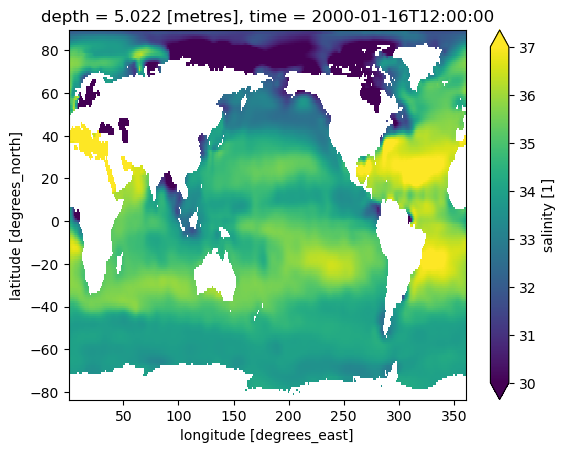

In [22]:
EN4.sel(time = "2000-01-16", depth = 0, method="nearest")["salinity"].plot(vmin=30, vmax=37)

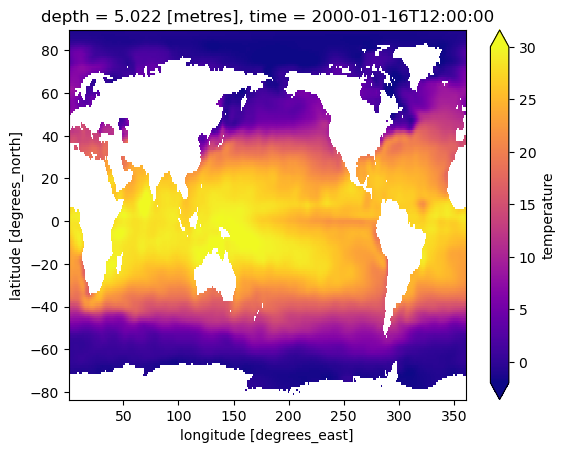

In [55]:
(EN4.sel(time = "2000-01-16", depth = 0, method="nearest")["temperature"]-273.15).plot(vmin = -2, vmax=30, cmap="plasma")

## Plot the monthly surface salinities in the Bay of Bengal

In [24]:
BoB_sal = EN4["salinity"].sel(lat = slice(10, 25), lon=slice(78, 93)).sel(depth = 0, method="nearest").mean(["lat", "lon"])

In [27]:
BoB_sal_std = EN4["salinity"].sel(lat = slice(10, 25), lon=slice(78, 93)).sel(depth = 0, method="nearest").std(["lat", "lon"])

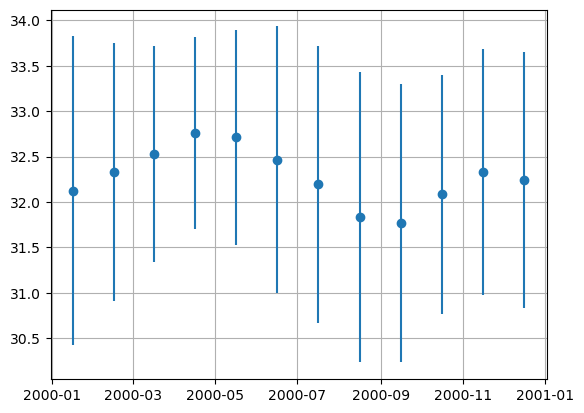

In [32]:
plt.errorbar(BoB_sal_std.time.values, BoB_sal, yerr=BoB_sal_std, linestyle=" ", marker="o")
plt.grid()

In [42]:
SO = EN4.sel(lat = slice(-80, -50))

In [43]:
SO

<xarray.Dataset>
Dimensions:                          (depth: 42, lat: 31, lon: 360, time: 12,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -80.0 -79.0 ... -51.0 -50.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 2000-01-16T12:00:0...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 31, 360), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 31, 360), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 31, 360), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 31, 360), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 31, 360), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 31, 360), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (time, depth, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

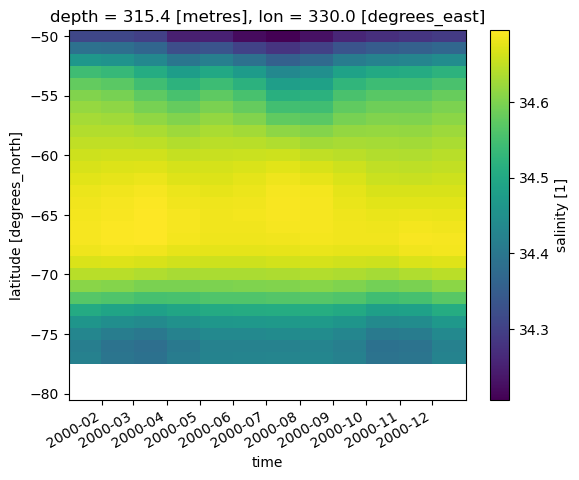

In [45]:
SO.sel(lon = 330, depth = 300, method="nearest")["salinity"].T.plot()

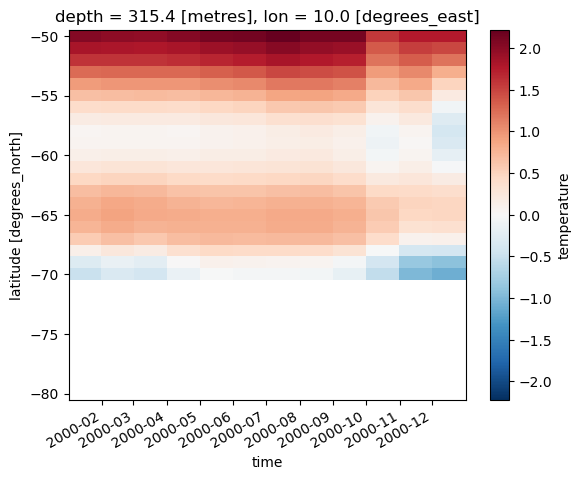

In [50]:
(SO.sel(lon = 10, depth = 300, method="nearest")["temperature"]-273.15).T.plot()

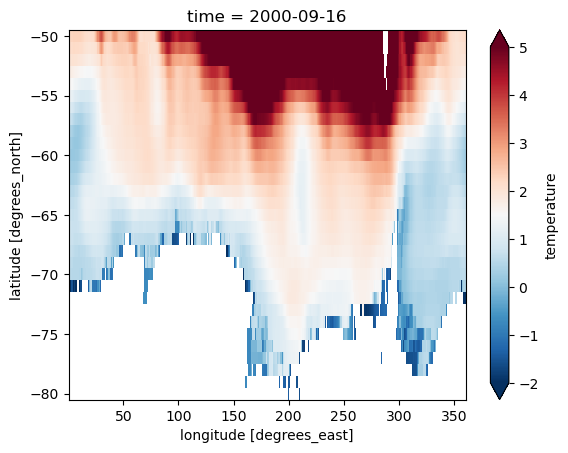

In [62]:
(SO["temperature"].sel(time = "2000-09-15",method="nearest").max("depth")-273.15).plot(vmin = -2, vmax=5, cmap="RdBu_r")

# Assignment:

Create an Xgcm grid object for the EN4 dataset. 
1. Use the grid object to compute the vertically integrated temperature in the Bay of Bengal.
2. Use grid object to compute the meridional surface density gradient in the Bay of Bengal and average it along the longitude axis.
    1. Use gsw toolbox to compute the density and then compute the density gradient.
    1. Plot a Hovmöller diagram with latitude on the Y axis and time on the X axis for the meridional surface density gradient in the Bay of Bengal.
